# About this project

**The primary aim** of this project is to **conduct an Exploratory Data Analysis (EDA)** on a dataset pertaining to Loan Status. The ultimate goal is to leverage **machine learning** techniques to predict whether to **approve or deny a loan application for a client**. Through comprehensive data exploration and sophisticated modeling, the project seeks to uncover insights that will inform the decision-making process in lending, ensuring optimal outcomes for both the financial institution and its clientele.

## Pipeline of the project


1. Contextualize the business problem.
2. Take a look at the data!
3. Split into test and train sets
4. Exploratory Data Analysis
    1. Categorical features
    2. Numerical features
    3. Outliers
    4. Correlation matrix
    5. Bivariate analysis
    6. Pairwise analysis of features
6. Apply the Decision Tree algorithm
7. Conclusions

# 1 - Business problem

**Interest on loans** is a **fundamental aspect of how banks make money** and is a significant contributor to their revenue streams. When a bank lends money to individuals, businesses, or other entities, it charges interest on the principal amount borrowed. This interest is essentially the cost of borrowing money and is expressed as a percentage of the loan amount. Therefore, predicting loan status is crucial for banks.

With a good loan prediction the bank can improve in several aspects. As following:

1. **Risk Management**: By accurately predicting loan status, banks can assess the level of risk associated with each loan application. This allows them to make informed decisions about whether to approve or deny a loan, thereby minimizing the risk of default and potential losses.

2. **Profitability**: Predicting loan status enables banks to optimize their lending practices to maximize profitability. By identifying low-risk borrowers, banks can offer them more favorable loan terms, such as lower interest rates, while charging higher rates to high-risk borrowers. This helps banks to maintain healthy profit margins while attracting reliable customers.

3. **Compliance**: Banks are subject to regulatory requirements that mandate responsible lending practices. Predicting loan status helps banks ensure compliance with these regulations by assessing the creditworthiness of borrowers and avoiding lending to individuals or businesses that are unlikely to repay their loans.

4. **Customer Satisfaction**: Accurate loan status prediction allows banks to offer better customer service by providing timely loan approvals or rejections. This enhances the overall customer experience and fosters goodwill towards the bank, leading to higher customer satisfaction and loyalty.

5. **Portfolio Management**: Understanding the predicted status of loans in their portfolio enables banks to manage their assets more effectively. By identifying potential problem loans early on, banks can take proactive measures to mitigate risk, such as restructuring loans or setting aside reserves for potential losses.

6. **Competitive Advantage**: Banks that can effectively predict loan status gain a competitive edge in the market. They can attract more customers by offering competitive loan products and better terms, while simultaneously minimizing their exposure to risky borrowers. This strengthens the bank's position in the industry and enhances its reputation as a reliable financial institution.

# 2 - Take a look at the data!

## Imports

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [149]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

## The dataset

The dataset can be found at kaggle: https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction

In [150]:
df = pd.read_csv('..\Data\loan_data.csv')

In [151]:
df.shape

(381, 13)

In [152]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## Dataset information

**1.** **Loan_ID:** A unique loan ID.  
**2.** **Gender:** Either male or female.  
**3.** **Married:** Whether Married (yes) or Not Married (No).  
**4.** **Dependents:** Number of persons depending on the client.  
**5.** **Education:** Applicant Education (Graduate or Undergraduate).  
**6.** **Self_Employed:** Self-employed (Yes/No).  
**7.** **ApplicantIncome:** Applicant income.  
**8.** **CoapplicantIncome:** Co-applicant income.  
**9.** **LoanAmount:** Loan amount in thousands.  
**10.** **Loan_Amount_Term:** Terms of the loan in months.  
**11.** **Credit_History:** Credit history meets guidelines.  
**12.** **Property_Area:** Applicants are living either Urban, Semi-Urban, or Rural.  
**13.** **Loan_Status:** Loan approved (Y/N).



In [153]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


### First informations

1. There is a co-applicant that have a bigger income than the applicant, once that the maximum applicant income is 9703 and the maximum co-applicant income is 33837.

2. We can also notice that there is some missing data in Loan_Amount_Term and Credity_History. That's something we need to take care of.

3. The avarage loan aumont is 105 thousand and the maximum loan aumont requested was 150 thousand.

4. Apparently there are some missing values in Loan_Amount_Term and Credity_History.

In [154]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [155]:
df.duplicated().sum()

0

Therefore, there is no duplicated data and we need also to take care of Gender, Dependents and Sel_Employed, because these columns have missing values.

It is a good pratice express the target value as binary when it is possible. Since Loan_Status can be expressed as binay, we gonna do this change.

In [156]:
df.Loan_Status = df.Loan_Status.map(lambda x: 1 if x == 'Y' else 0)

In [157]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [158]:
education_counts = df.Education.value_counts()
education_counts.values

array([278, 103], dtype=int64)

We will not need the Loan_ID for the analysis, therefore we gonna drop it.

In [159]:
df = df.drop(columns =['Loan_ID'])

# 3 - Split the dataset in train and test

1. We need to split the dataset into train and test to train and test our model.
2. Doing so also helps to avoid data leakage.
3. Lets use the conventional notation to train, test and target.

In [160]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,1
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1


In [161]:
print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (304, 11).
Train target dataset shape: (304,).
Test predictor dataset shape: (77, 11).
Test target dataset shape: (77,).


In [162]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
Loan_Status
1    0.710526
0    0.289474
Name: proportion, dtype: float64

Test target proportion: 
Loan_Status
1    0.714286
0    0.285714
Name: proportion, dtype: float64


# 4 - EDA

Let's delve into an in-depth analysis of the train dataset. We'll start by examining individual feature behaviors through univariate analysis. Then, we'll explore the relationships between these features using bivariate and multivariate analysis to identify correlations and gain valuable insights.

You see, but you do not observe.
Sherlock Holmes to Watson in A Scandal in Bohemia.

At first, we need to separate the categorical features from the numerical ones, because the techniques to analyze each type are different(in some situations they can be analyzed with the same technique, but we're not doing this in the analysis).

In [163]:
train = pd.concat([X_train, y_train], axis = 1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
183,Male,Yes,2,Graduate,No,4400,0.0,127.0,360.0,0.0,Semiurban,0
306,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,1
6,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,1
270,Male,Yes,0,Graduate,No,2666,4300.0,121.0,360.0,1.0,Rural,1
368,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,1


In [164]:
numerical_features = X_train.select_dtypes('number').columns.to_list()
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [165]:
X_train.Credit_History.value_counts()

Credit_History
1.0    231
0.0     46
Name: count, dtype: int64

Notice that Credit_History have only two type os values but its values behave like float numbers(because of the .0). We should move Credit_History to the categorical features.

In [166]:
categorical_features = X_train.select_dtypes('object').columns.to_list()
categorical_features.append(numerical_features.pop())

categorical_features.append('Loan_Status')

categorical_features
numerical_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

## Univariate analysis

### Lets give a look into the categorical features

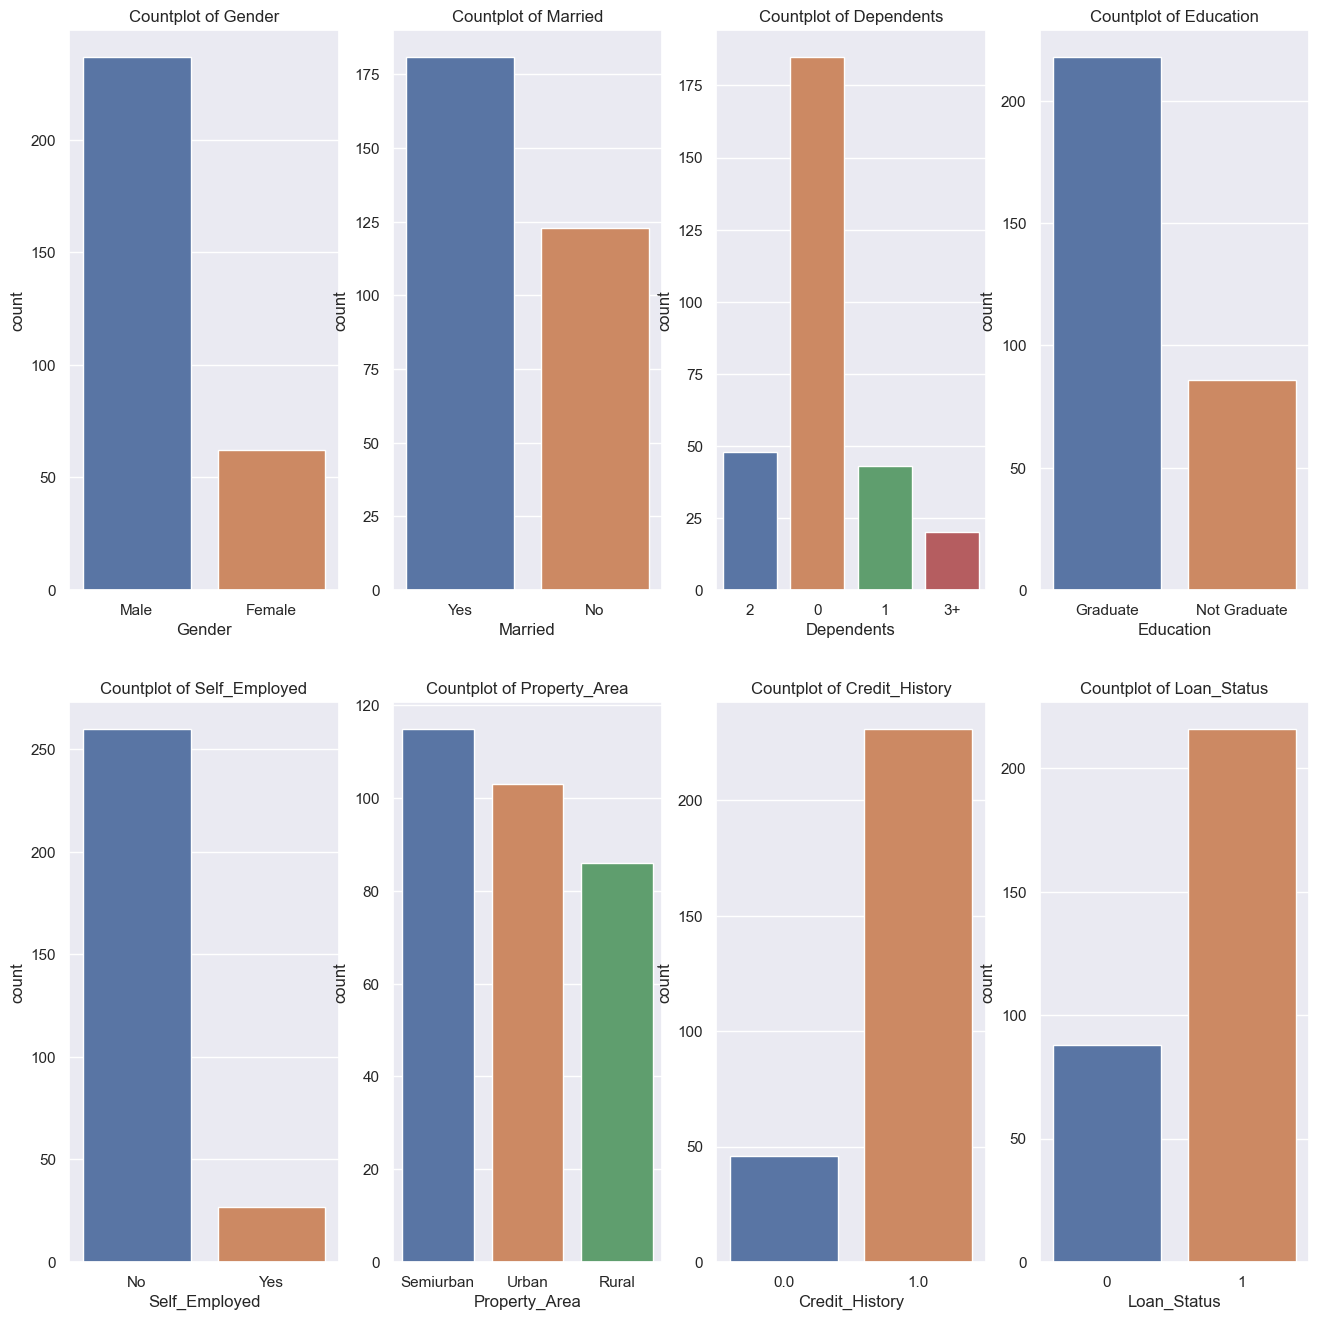

In [167]:
sns.set_theme()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 16))


row = 0
col = 0

for i, feature in enumerate(categorical_features):
    if i == 4:
        row = 1
        col = 0

    sns.countplot(data=train, x=feature, ax=axes[row,col])
    axes[row,col].set_title(f'Countplot of {feature}')
    
    col += 1

plt.show()
plt.close()

Main Insights:
   1. Most part of the people who ask for a loan is a man.
   2. Most of part do not have any child/dependent.
   3. Most have a graduation degree.
   4. Big part do not work as self employed.
   5. The area of property is balanced.
   6. Most have some credity history.
   7. The Loan status is unbalanced.

### Now let's check the numerical ones

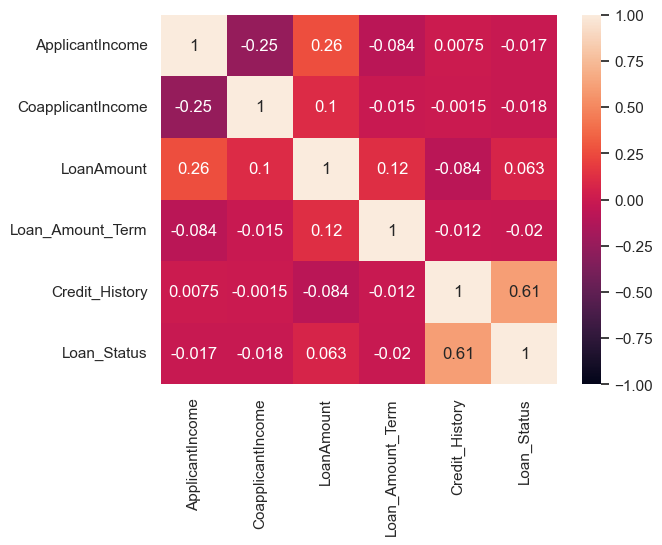

In [181]:
corr_matrix = train.corr(numeric_only=True)
corr_matrix['Loan_Status'].sort_values(ascending=False)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

**Main Insights**

1. There is moderate positive correlation between the credit history and the loan status.
2. There is a **very weak** positive correlation between the loan amount and the applicant income.

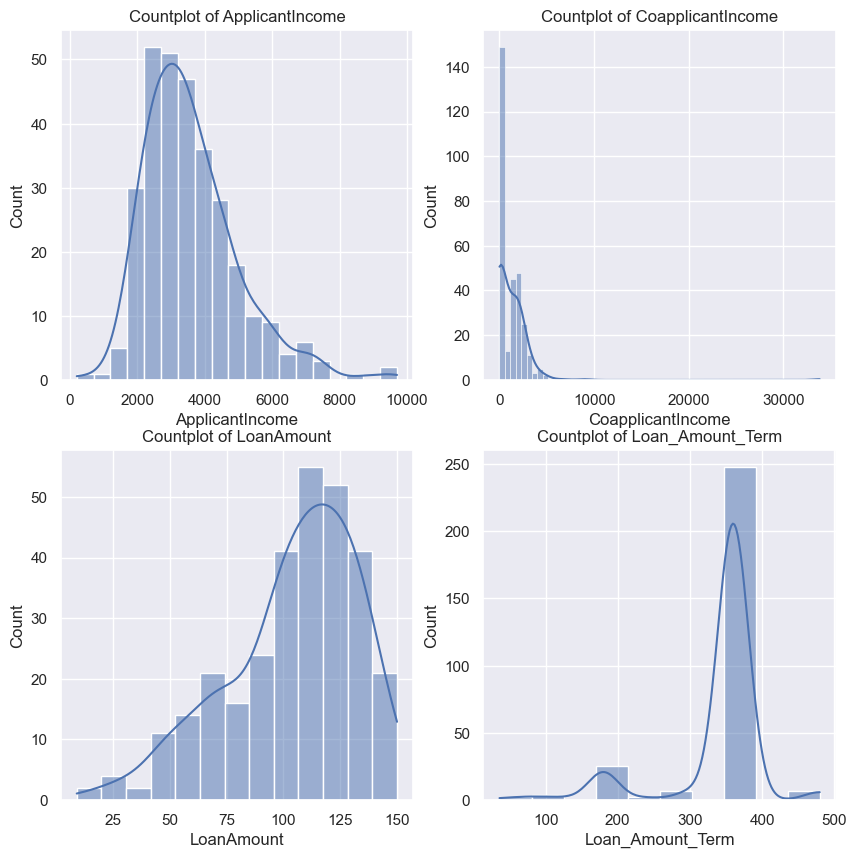

In [168]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

row = 0
col = 0

for i, feature in enumerate(numerical_features):
    if i == 2:
        row = 1
        col = 0

    sns.histplot(data=train, x=feature,kde = True, ax=axes[row,col])
    axes[row,col].set_title(f'Countplot of {feature}')
    
    col += 1

plt.show()
plt.close()

Main Insights:
   1. Most of the applicants have a **income between 2000 and 5000**. Also, the distribution of the income seems to have a slightly **positive skew**.
   2. Most of the coapplicants **do not** have any income.
   3. The majority of loan amount requested for the applicants is between 75 thousand and 140 thousand, with a **peak between 100 and 125**. Also, the loan amount distribuition seems to have a **negative skew**.
   4. The most of the loan amount term is about 350 months.
    

We should give a better look at the outlier values in our data. But, what is a outlier? We can define outliers values using the interquartile range.

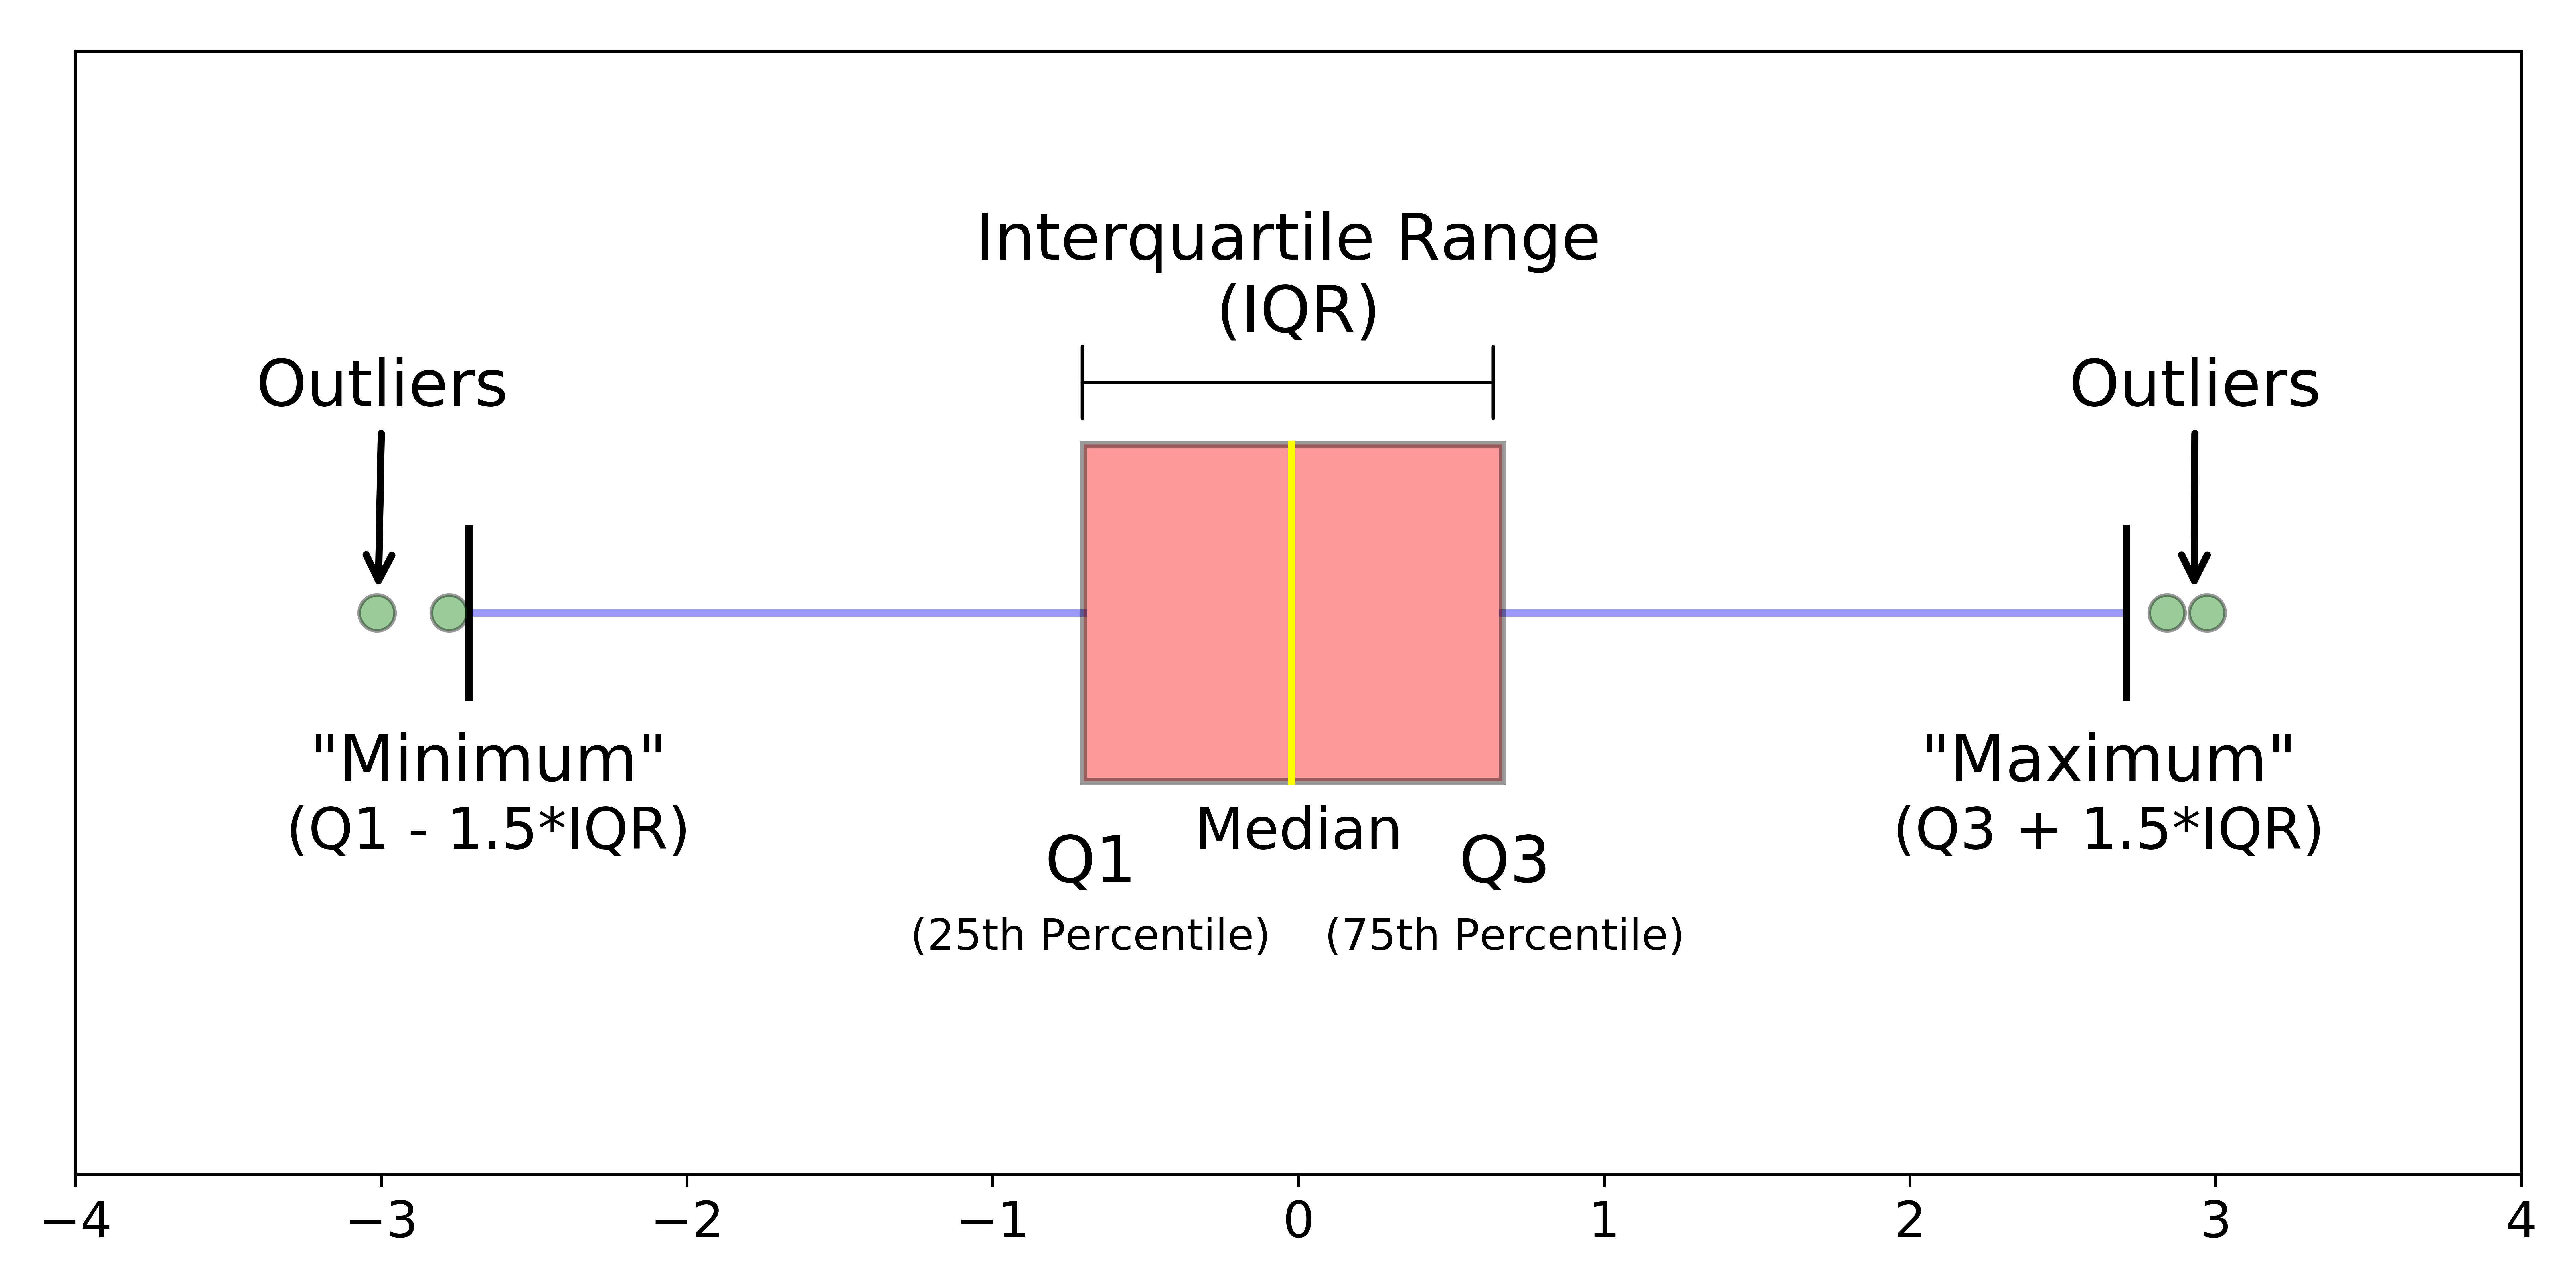

Therefore, the outliers are the values that outrange the minimum or maximum limits.

Now let's search for outliers in the data. We can also visualize they with boxplots, as follow:

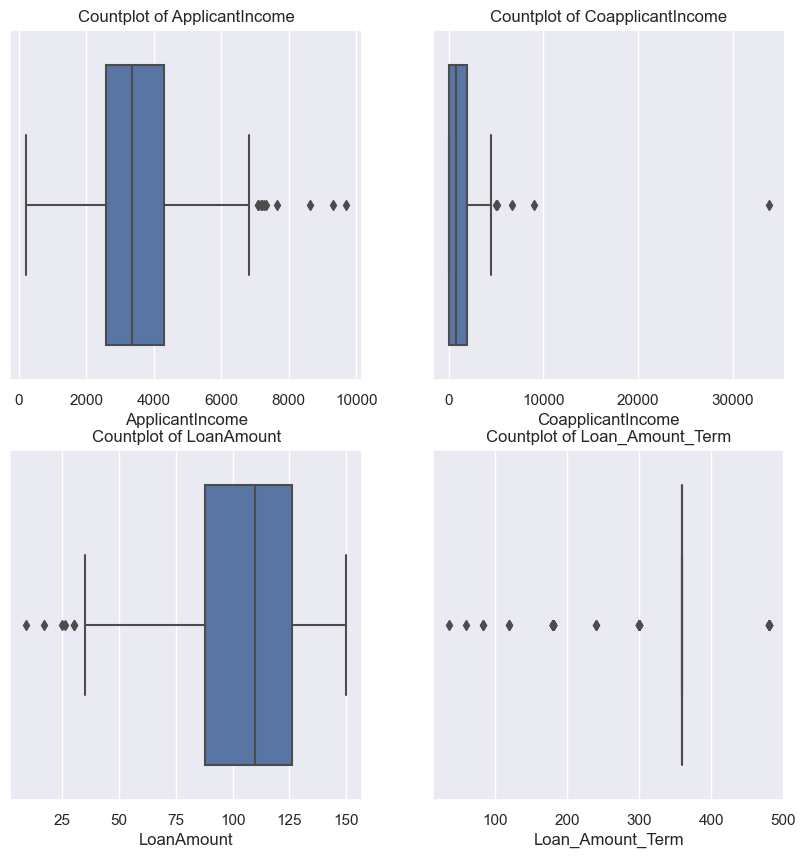

In [169]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

row = 0
col = 0

for i, feature in enumerate(numerical_features):
    if i == 2:
        row = 1
        col = 0
        
    sns.boxplot(data=train, x=feature, ax=axes[row,col])
    axes[row,col].set_title(f'Countplot of {feature}')
    col += 1

plt.show()
plt.close()

## Bivariated Analysis

In [170]:
#corr_matrix = train.corr(numeric_only=True)
#corr_matrix['Loan_Status'].sort_values(ascending=False)

In [171]:
#sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
#plt.show()

### Numerical features by loan status

Now, let's look into some scatter plots

<Axes: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

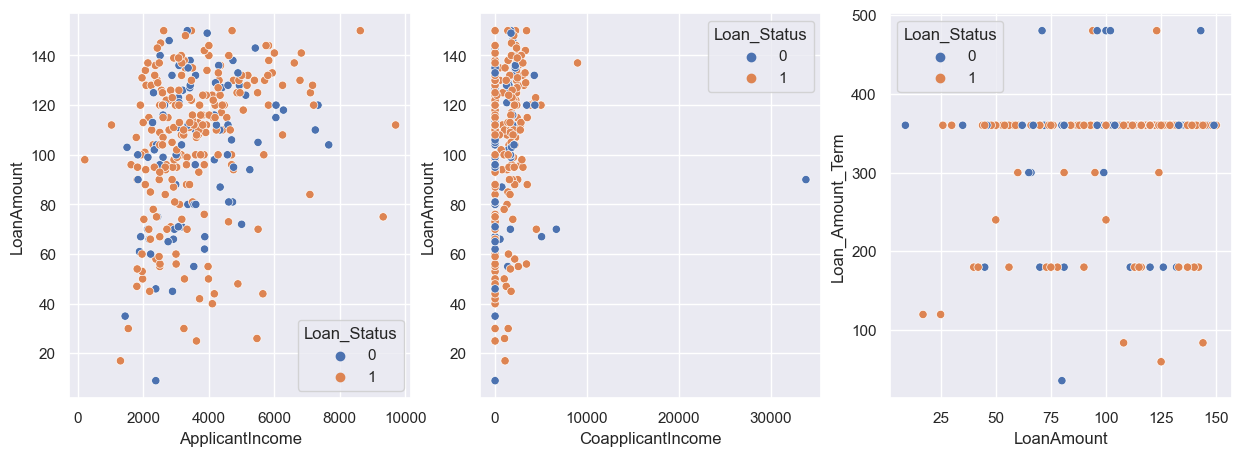

In [172]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

sns.scatterplot(data = train, x = 'ApplicantIncome', y = 'LoanAmount', hue ='Loan_Status', ax = axes[0])
sns.scatterplot(data = train, x = 'CoapplicantIncome', y = 'LoanAmount', hue ='Loan_Status', ax = axes[1])
sns.scatterplot(data = train, x = 'LoanAmount', y = 'Loan_Amount_Term', hue ='Loan_Status', ax = axes[2])

**Main Insights**

1. Does not seem to have a high correlation between the loan amount requested and the applicant income.
2. As we have several coapplicants with no income, it does not see to be determinant(have or not income) to the loan amount requested.
3. The loan amount term seems to not influence at all the loan amount or the loan status.

### Categorical features by loan status


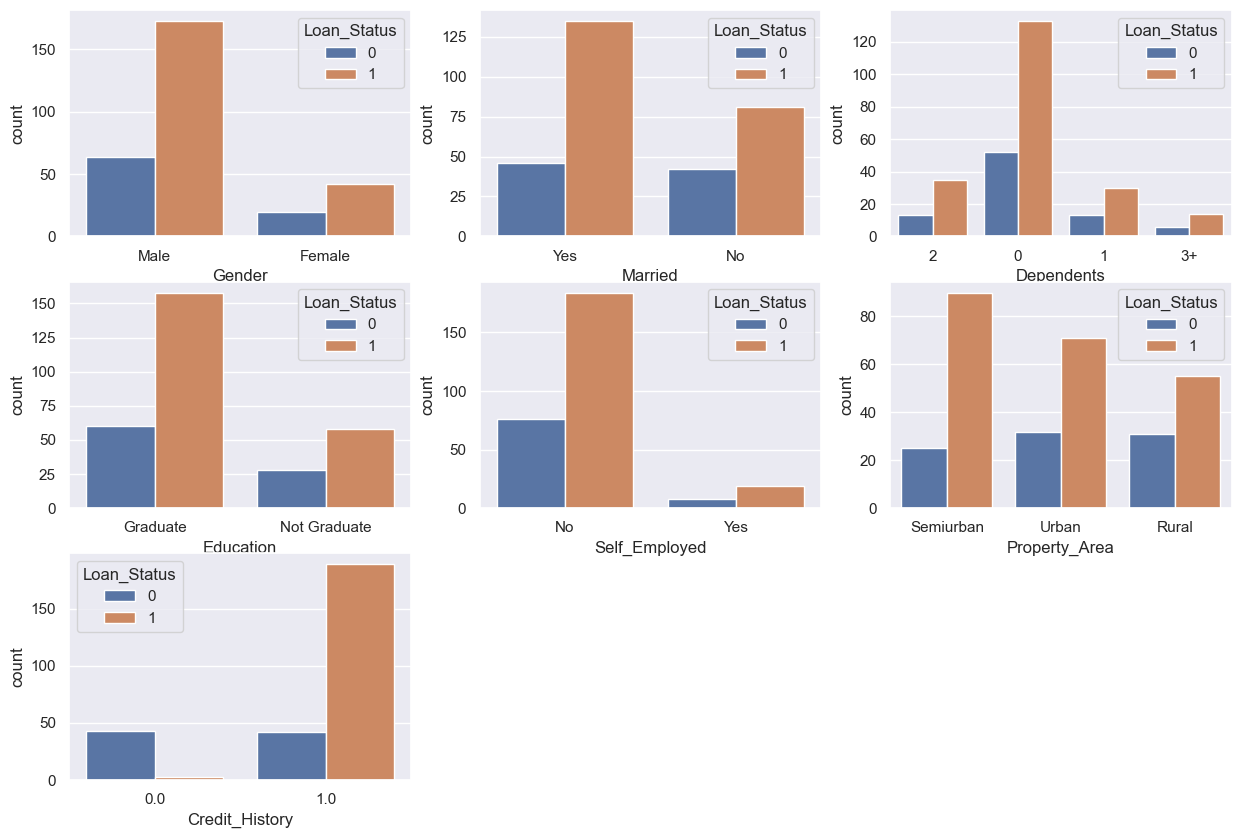

In [173]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
categorical_features

sns.countplot(data = train, x= 'Gender', hue = 'Loan_Status', ax= axes[0, 0])
sns.countplot(data = train, x= 'Married', hue = 'Loan_Status', ax= axes[0, 1])
sns.countplot(data = train, x= 'Dependents', hue = 'Loan_Status', ax= axes[0, 2])
sns.countplot(data = train, x= 'Education', hue = 'Loan_Status', ax= axes[1, 0])
sns.countplot(data = train, x= 'Self_Employed', hue = 'Loan_Status', ax= axes[1, 1])
sns.countplot(data = train, x= 'Property_Area', hue = 'Loan_Status', ax= axes[1, 2])
sns.countplot(data = train, x= 'Credit_History', hue = 'Loan_Status', ax= axes[2, 0])

axes[2,1].remove()
axes[2,2].remove()


plt.show()
plt.close()

**Main Insights**

1. Gender seems to not influence in order to get a loan.
2. If you are not married, its more likely that you won't receive a loan.
3. Have a graduate degree seems to help to get a loan.
4. A credit history definitely helps to get a loan.

### Numerical x Categorical features

Now, we gonna explore the relationship between numerical and categorical features. For that, we gonna ask and answer some questions.

**1. Who request a bigger loan amount, men or womem?**

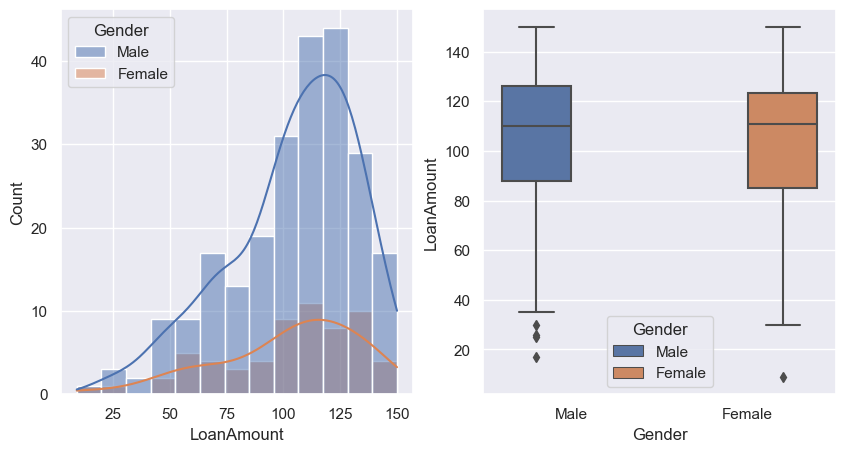

In [174]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(10,5))

sns.histplot(data=train, x='LoanAmount', hue = 'Gender',kde = True, ax = axes[0])
sns.boxplot(data=train, x='Gender', y = 'LoanAmount', hue = 'Gender', ax = axes[1])

plt.show()
plt.close()

It seems to not have difference in amount requested by men and womem.

**2. Who request a bigger loan amount, graduates or not graduates?**

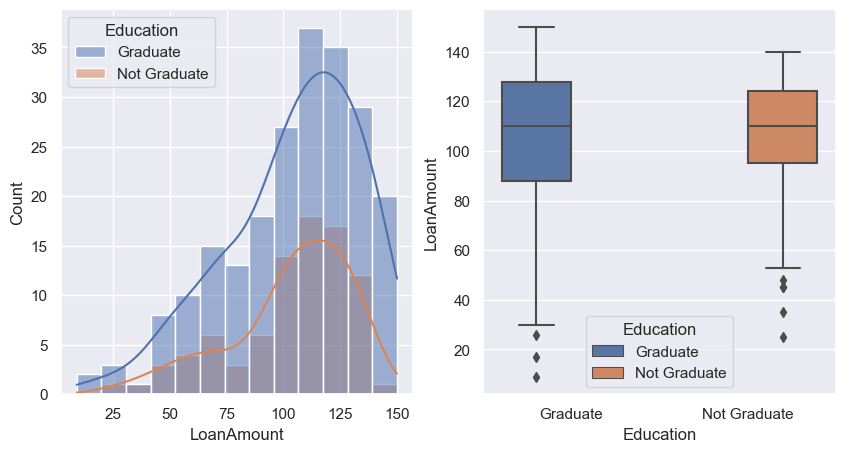

In [175]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(10,5))

sns.histplot(data=train, x='LoanAmount', hue = 'Education',kde = True, ax = axes[0])
sns.boxplot(data=train, x='Education', y = 'LoanAmount', hue = 'Education', ax = axes[1])

plt.show()
plt.close()

We can observe that have a graduation degree does not show a big difference in the loan amount requested.

**3. Who have a bigger income, men or not womem?**

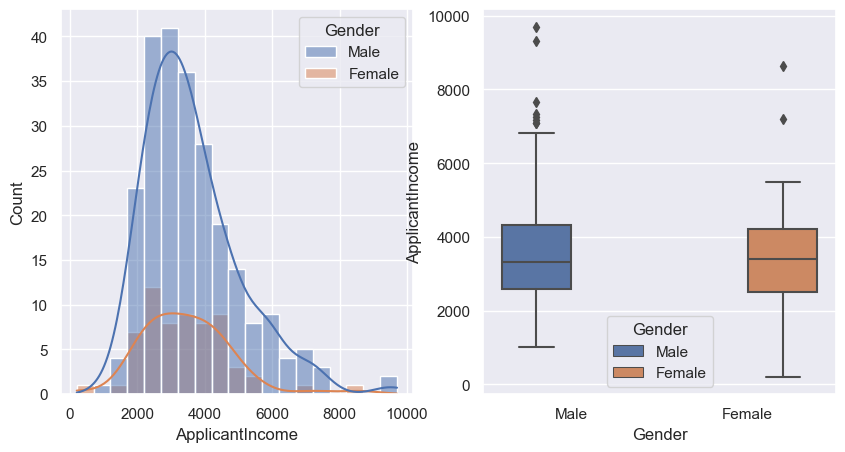

In [176]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(10,5))

sns.histplot(data=train, x='ApplicantIncome', hue = 'Gender',kde = True, ax = axes[0])
sns.boxplot(data=train, x='Gender', y = 'ApplicantIncome', hue = 'Gender', ax = axes[1])

plt.show()
plt.close()

Womem do have a lower income. We can see that in the boxplot. Man have higher maximum and several outliers above it, also womem do have a lower minimum.

**4. Who have a bigger income, graduates or not graduates?**

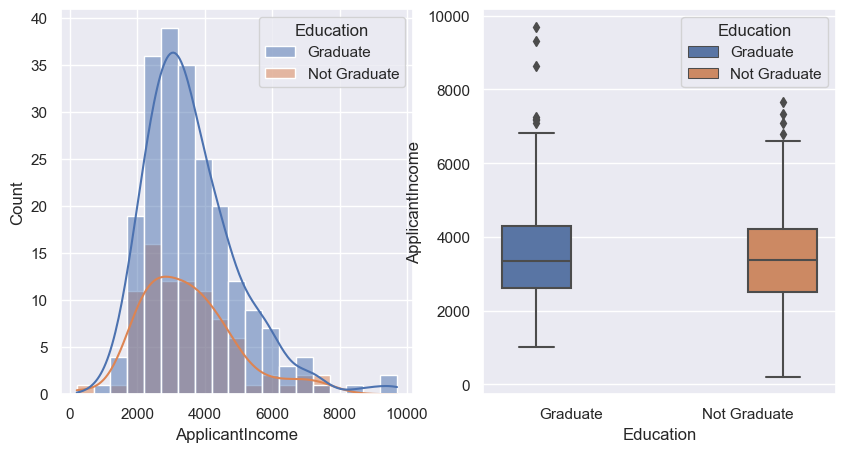

In [177]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(10,5))

sns.histplot(data=train, x='ApplicantIncome', hue = 'Education',kde = True, ax = axes[0])
sns.boxplot(data=train, x='Education', y = 'ApplicantIncome', hue = 'Education', ax = axes[1])

plt.show()
plt.close()

It seems that have a graduation degree do not make a notorius difference between the applicants income.

**5. Who have a bigger income, married or not married?**

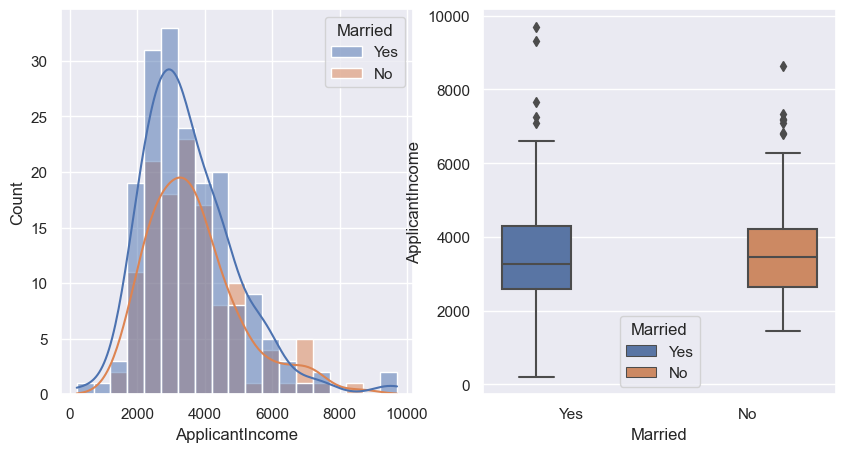

In [178]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(10,5))

sns.histplot(data=train, x='ApplicantIncome', hue = 'Married',kde = True, ax = axes[0])
sns.boxplot(data=train, x='Married', y = 'ApplicantIncome', hue = 'Married', ax = axes[1])

plt.show()
plt.close()

There is no big difference in the income of married and not married applicants.

**6. People who request a bigger loan have more dependents?**

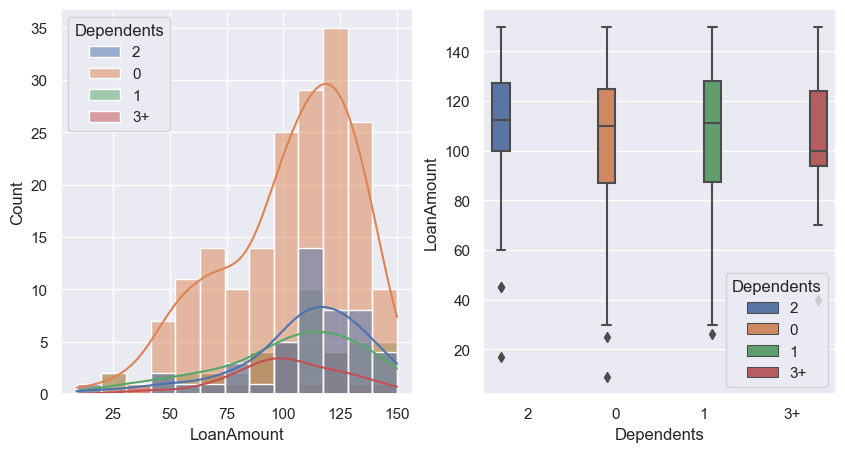

In [179]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(10,5))

sns.histplot(data=train, x='LoanAmount', hue = 'Dependents',kde = True, ax = axes[0])
sns.boxplot(data=train, x='Dependents', y = 'LoanAmount', hue = 'Dependents', ax = axes[1])

plt.show()
plt.close()

Observe that people who have 3 or more dependents seems to request higher loan, once its mininum is higher than the minimum of the others categories(0,1 or 2)

# Main Conclusions

1. Most part of the applicants are men, do not have any dependent, are graduate, not self employed and have a credit history.
2. The applicant income mean is about 3.5k and the loan amount requested mean is about 105k
3. Seems there is no correlation between the applicant income and the loan amount requested.
4. If you are not married, you are more likely to not recieve a loan.
5. If you do not have a credi history, is extremely unlikely that you recieve a loan.
6. Womem seems to have a lower income, but it does not influence to get or not a loan.
7. People whit tree or more dependents request a higher loan


**With these informations we gain a better understanding about the profile of our costumers, which lead us to better decision in the business.**